#### UFRJ - Universidade Federal do Rio de Janeiro
#### IM   - Instituto de Matemática
#### DMA  - Departamento de Matemática Aplicada
#### TMAA - Top. Mat. Aplicada A - Programação I

###  ED04 - Perfil do Eleitorado 2018
### ALUNA: Jackeline Carvalho - DRE: 116043481
### Data de entrega: 18 de julho de 2018

##### Considerando o seguinte caso hipotético: Você foi recentemente contratado por uma grande empresa de análise de dados e chefe da sua equipe lhe pediu para terminar um programa para produzir gráficos de barra do “Perfil do Eleitorado com base nos dados produzido pelo TSE”. O programa deve apresentar três gráficos de barra com o perfil do eleitorado por UF, por Faixa Etária e por Escolaridade

In [105]:
#Importando as bibliotecas que serão usadas:
import numpy as np
import pandas as pd
import math

####  Leitura do arquivo  com os dados do perfil eleitorado:


In [106]:
#Lendo o arquivo:
perfil_eleitorado = pd.read_csv("perfil_eleitorado_2018.csv", sep = ";", encoding="ISO-8859-1")

In [107]:
#verificando as colunas que existem na tabela:
perfil_eleitorado.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

####  Construção do gráfico do perfil eleitorado por Faixa Etária:

In [108]:
#obtendo as faixas etárias:
legendas_faixaetaria = ['16 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 a 24 anos', '25 a 29 anos', '30 a 34 anos',
           '35 a 39 anos', '40 a 44 anos', '45 a 49 anos', '50 a 54 anos', '55 a 59 anos', '60 a 64 anos', '65 a 69 anos',
           '70 a 74 anos', '75 a 79 anos', '80 a 84 anos', '85 a 89 anos', '90 a 94 anos', '95 a 99 anos', '100 anos ou mais']

In [109]:
# A partir do dataframe, nos dados em que o genero é diferente de 'NAO INFORMADO' 

masc_e_fem = perfil_eleitorado[perfil_eleitorado["DS_GENERO"] != 'NÃO INFORMADO']

# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e faixa etaria

new_data = masc_e_fem.groupby(['CD_FAIXA_ETARIA', 'DS_GENERO']).sum()['QT_ELEITORES_PERFIL'][2:] #retirando os não informados

#Agora, um formato adequado para plotar o gráfico:

vetor = np.array(new_data)
data_plot = vetor.reshape(22,2)

[Text(0,0,'16 anos'),
 Text(0,0,'17 anos'),
 Text(0,0,'18 anos'),
 Text(0,0,'19 anos'),
 Text(0,0,'20 anos'),
 Text(0,0,'21 a 24 anos'),
 Text(0,0,'25 a 29 anos'),
 Text(0,0,'30 a 34 anos'),
 Text(0,0,'35 a 39 anos'),
 Text(0,0,'40 a 44 anos'),
 Text(0,0,'45 a 49 anos'),
 Text(0,0,'50 a 54 anos'),
 Text(0,0,'55 a 59 anos'),
 Text(0,0,'60 a 64 anos'),
 Text(0,0,'65 a 69 anos'),
 Text(0,0,'70 a 74 anos'),
 Text(0,0,'75 a 79 anos'),
 Text(0,0,'80 a 84 anos'),
 Text(0,0,'85 a 89 anos'),
 Text(0,0,'90 a 94 anos'),
 Text(0,0,'95 a 99 anos'),
 Text(0,0,'100 anos ou mais')]

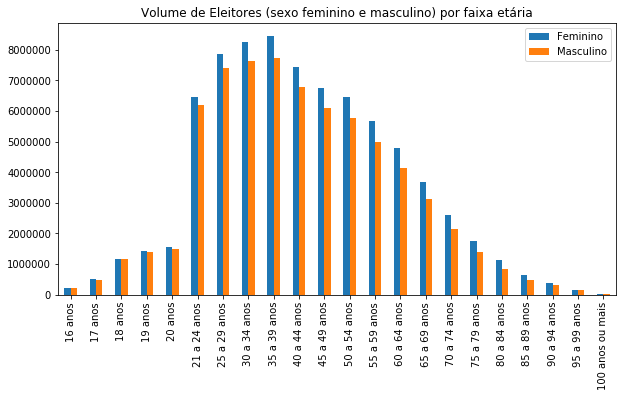

In [110]:
df = pd.DataFrame(data=data_plot, columns=['Feminino', 'Masculino'])
df.plot(kind = 'bar', title = 'Volume de Eleitores (sexo feminino e masculino) por faixa etária', figsize = (10,5), grid = False).set_xticklabels(legendas_faixaetaria)

In [111]:
# help(pd.DataFrame.plot)

####  Construção do gráfico do perfil eleitorado por UF:

In [112]:
# encontrandos as UF's e colocando em ordem alfabética:
ufs = perfil_eleitorado['SG_UF'].unique()
ufs.sort()
ufs

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO', 'ZZ'], dtype=object)

In [113]:
# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e UF:
new_data2 = masc_e_fem.groupby(['SG_UF', 'DS_GENERO']).sum()['QT_ELEITORES_PERFIL']

#Agora, um formato adequado para plotar o gráfico:
vetor2 = np.array(new_data2)
data_plot2 = vetor2.reshape(28,2)

[Text(0,0,'AC'),
 Text(0,0,'AL'),
 Text(0,0,'AM'),
 Text(0,0,'AP'),
 Text(0,0,'BA'),
 Text(0,0,'CE'),
 Text(0,0,'DF'),
 Text(0,0,'ES'),
 Text(0,0,'GO'),
 Text(0,0,'MA'),
 Text(0,0,'MG'),
 Text(0,0,'MS'),
 Text(0,0,'MT'),
 Text(0,0,'PA'),
 Text(0,0,'PB'),
 Text(0,0,'PE'),
 Text(0,0,'PI'),
 Text(0,0,'PR'),
 Text(0,0,'RJ'),
 Text(0,0,'RN'),
 Text(0,0,'RO'),
 Text(0,0,'RR'),
 Text(0,0,'RS'),
 Text(0,0,'SC'),
 Text(0,0,'SE'),
 Text(0,0,'SP'),
 Text(0,0,'TO'),
 Text(0,0,'ZZ')]

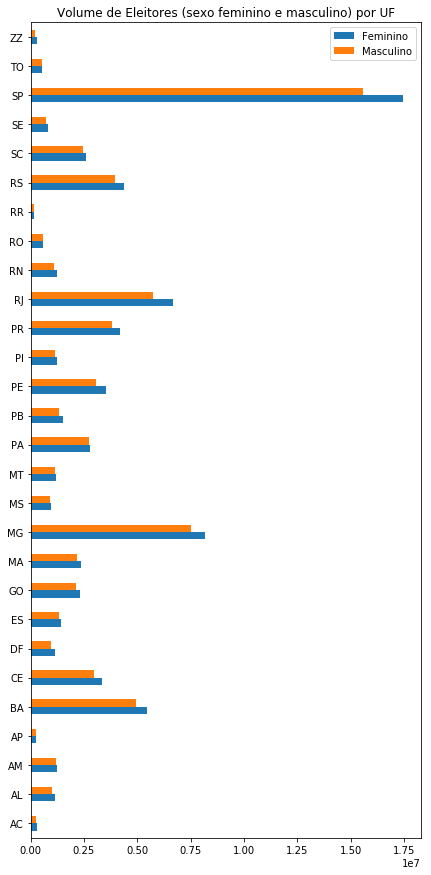

In [114]:
df = pd.DataFrame(data=data_plot2, columns=['Feminino', 'Masculino'])
df.plot(kind = 'barh', title = 'Volume de Eleitores (sexo feminino e masculino) por UF', figsize = (7,15), grid = False).set_yticklabels(ufs)

####  Construção do gráfico do perfil eleitorado por Escolaridade:

In [129]:
#Obtendo as escolaridades e colocando em ordem alfabética:
escolaridade = perfil_eleitorado['DS_GRAU_ESCOLARIDADE'].unique()
escolaridade.sort()
escolaridade

array(['ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
       'SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO'], dtype=object)

In [135]:
# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e  Escolaridade:
new_data3 = masc_e_fem.groupby(['DS_GRAU_ESCOLARIDADE', 'DS_GENERO']).sum()['QT_ELEITORES_PERFIL']

#Agora, um formato adequado para plotar o gráfico:
vetor3 = np.array(new_data3)
data_plot3 = vetor3.reshape(9,2)

[Text(0,0,'ANALFABETO'),
 Text(0,0,'ENSINO FUNDAMENTAL COMPLETO'),
 Text(0,0,'ENSINO FUNDAMENTAL INCOMPLETO'),
 Text(0,0,'ENSINO MÉDIO COMPLETO'),
 Text(0,0,'ENSINO MÉDIO INCOMPLETO'),
 Text(0,0,'LÊ E ESCREVE'),
 Text(0,0,'NÃO INFORMADO'),
 Text(0,0,'SUPERIOR COMPLETO'),
 Text(0,0,'SUPERIOR INCOMPLETO')]

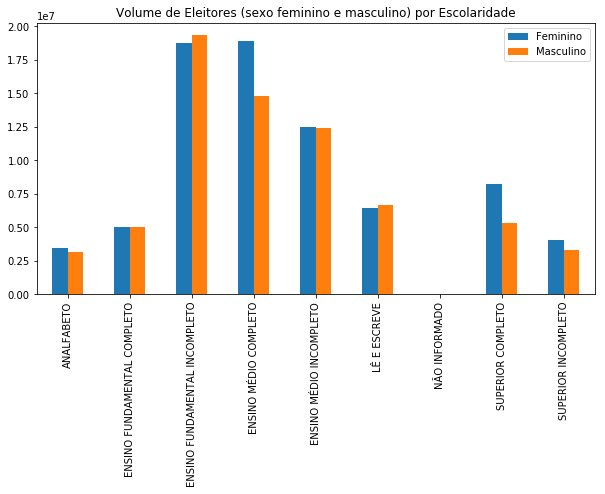

In [132]:
df = pd.DataFrame(data=data_plot3, columns=['Feminino', 'Masculino'])
df.plot(kind = 'bar', title = 'Volume de Eleitores (sexo feminino e masculino) por Escolaridade', figsize = (10,5), grid = False).set_xticklabels(escolaridade)